# Data Description

# import  libraries

In [41]:
# Accordingly we import few libraries
import pandas as pd # used for data analysis and manupulation.
import numpy as np # used for mathematical opearation of data.
import seaborn as sns # this libraray is used to make statistical graphics to analyse problem statement.
import matplotlib.pyplot as plt # its is a numerical extention of numpy and also used for data visualization and graphical plotting

from sklearn.preprocessing import LabelEncoder# used for normalising labels(non numerical to numerical labels)
from sklearn.model_selection import train_test_split # used to split the available data to test and train the model
from sklearn.linear_model import LinearRegression# supervised machine learning algorithm used to find relationship between the varibles.
from sklearn.ensemble import RandomForestRegressor# help determine the most important feature selction for our model that increases accuracy and reduce error.
from sklearn.linear_model import Ridge# Supervised machine learning language

import warnings
warnings.filterwarnings('ignore')# ignores the warnings that are not really necessary.

In [42]:
# Importing Dataset
GPP=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')


In [43]:
GPP.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [44]:
GPP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [45]:
GPP.shape

(907, 27)

In [46]:
GPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

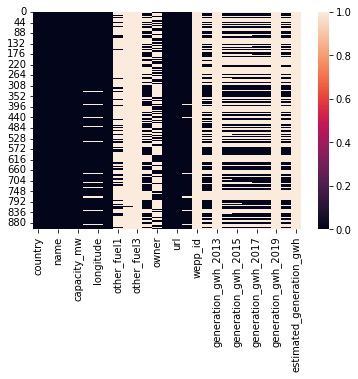

In [47]:
sns.heatmap(GPP.isnull())
plt.show()

In [48]:
#checking the Null Values in data Frame
GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [49]:
#Checking the datatypes of the columns
GPP.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [50]:
GPP['country'].unique()

array(['IND'], dtype=object)

In [51]:
c_plant = GPP.country_long.value_counts().head(15)
c_plant

India    907
Name: country_long, dtype: int64

In [52]:
#To count the number of distinct or unique observations
GPP.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [53]:
GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [54]:
# Check all the columns
GPP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [55]:
#Drop the columns
GPP_new=GPP.drop(['country','country_long', 'name', 'gppd_idnr','url','geolocation_source','wepp_id'],axis=1)

In [56]:
GPP=GPP_new

In [57]:
GPP.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [58]:
GPP['total_generation'] = GPP['generation_gwh_2013'] + GPP['generation_gwh_2014'] + GPP['generation_gwh_2015'] + GPP['generation_gwh_2016'] + GPP['generation_gwh_2017']+ GPP['generation_gwh_2018'] + GPP['generation_gwh_2019']

In [59]:
GPP.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],axis=1,inplace=True)

In [60]:
GPP.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,Central Electricity Authority,NaN,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,Central Electricity Authority,NaN,NaN


In [61]:
##checking the Null Values in data Frame
GPP.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    907
total_generation            907
dtype: int64

We will drop other fuels columns also, as they have many missing values and will not impact on generation.

In [62]:
GPP.drop(['other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [63]:
GPP.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
commissioning_year          380
owner                       565
source                        0
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    907
total_generation            907
dtype: int64

In [64]:
GPP.drop(['owner','generation_data_source'],axis=1,inplace=True)

In [65]:
GPP.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
commissioning_year          380
source                        0
year_of_capacity_data       388
estimated_generation_gwh    907
total_generation            907
dtype: int64

Here we will drop the estimated_generation_gwh and total_generation also, because they have around 907 missing values. So, we dont have data to predict the output.

We will drop missing values from latitude and longitude column

In [66]:
GPP.dropna(subset = ['latitude','longitude'],inplace=True)

In [67]:
GPP.isnull().sum()

capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year          365
source                        0
year_of_capacity_data       369
estimated_generation_gwh    861
total_generation            861
dtype: int64

In [68]:
GPP.drop(['estimated_generation_gwh','total_generation'],axis=1,inplace=True)

In [69]:
GPP.isnull().sum()

capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
commissioning_year       365
source                     0
year_of_capacity_data    369
dtype: int64

In [70]:
fuel_count = GPP.primary_fuel.value_counts()
fuel_count

Coal       253
Hydro      233
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         17
Nuclear      9
Name: primary_fuel, dtype: int64

In [71]:
Primary_fuel = GPP.primary_fuel.value_counts() * 100 / GPP.primary_fuel.count()
Primary_fuel

Coal       29.384437
Hydro      27.061556
Solar      14.285714
Wind       12.543554
Gas         7.897793
Biomass     5.807201
Oil         1.974448
Nuclear     1.045296
Name: primary_fuel, dtype: float64

In [72]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Type of fuel used in power plant')

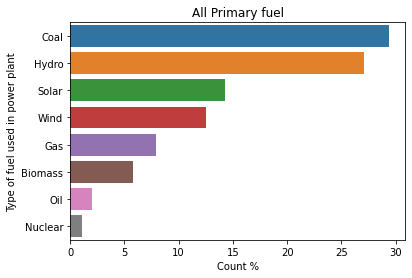

In [73]:
sns.barplot(x = Primary_fuel, y = Primary_fuel.index)
plt.title('All Primary fuel')
plt.xlabel('Count %')
plt.ylabel('Type of fuel used in power plant')


Text(0.5, 1.0, 'power plant capacity and primary fuel')

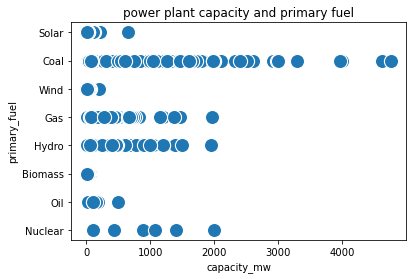

In [76]:
sns.scatterplot(x = GPP.capacity_mw, y = GPP.primary_fuel, s = 200)
plt.title('power plant capacity and primary fuel')

In [77]:
All_capacity = GPP.capacity_mw.sum()
All_capacity

293068.946

In [78]:
GPP.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [80]:
fossil_fuel = GPP.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear'])
no_of_fossil_fuel_plant = fossil_fuel.value_counts().head()
no_of_fossil_fuel_plant

False    514
True     347
Name: primary_fuel, dtype: int64

In [81]:
renewable = GPP.primary_fuel.isin(['Solar', 'Wind', 'Hydro', 'Biomass'])
no_of_renewable_plant = renewable.value_counts().head()
no_of_renewable_plant

True     514
False    347
Name: primary_fuel, dtype: int64

In [82]:
GPP.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data
count,861.000000,861.000000,861.000000,496.000000,492.0
mean,340.382051,21.197918,77.464907,1997.012097,2019.0
std,601.830519,6.239612,4.939316,16.924546,0.0
min,0.000000,8.168900,68.644700,1927.000000,2019.0
25%,18.000000,16.773900,74.256200,1988.000000,2019.0
50%,60.000000,21.780000,76.719500,2001.000000,2019.0
75%,412.020000,25.512400,79.440800,2011.000000,2019.0
max,4760.000000,34.649000,95.408000,2018.000000,2019.0


In [83]:
GPP.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'year_of_capacity_data'],
      dtype='object')

In [84]:
from sklearn.impute import SimpleImputer

In [86]:
imp= SimpleImputer(strategy='most_frequent')
GPP['commissioning_year']=imp.fit_transform(GPP['commissioning_year'].values.reshape(-1, 1))
GPP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,NaN
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2019.0
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2019.0


In [88]:
imp= SimpleImputer(strategy='most_frequent')
GPP['year_of_capacity_data']=imp.fit_transform(GPP['year_of_capacity_data'].values.reshape(-1, 1))
GPP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2019.0
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,2019.0
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,2019.0
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2019.0
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2019.0


In [90]:
GPP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            861 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           861 non-null    object 
 4   commissioning_year     861 non-null    float64
 5   source                 861 non-null    object 
 6   year_of_capacity_data  861 non-null    float64
dtypes: float64(5), object(2)
memory usage: 53.8+ KB


In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['primary_fuel', 'source']
for val in list1:
    GPP[val]=le.fit_transform(GPP[val].astype(str))

GPP

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,6,2011.0,12,2019.0
1,98.0,24.7663,74.6090,1,2015.0,84,2019.0
2,39.2,21.9038,69.3732,7,2015.0,105,2019.0
3,135.0,23.8712,91.3602,2,2004.0,106,2019.0
4,1800.0,21.9603,82.4091,1,2015.0,106,2019.0
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,106,2019.0
903,3.0,12.8932,78.1654,6,2015.0,166,2019.0
904,25.5,15.2758,75.5811,7,2015.0,105,2019.0
905,80.0,24.3500,73.7477,1,2015.0,146,2019.0


In [93]:
first_column=GPP.pop('primary_fuel')

In [94]:
GPP.insert(6, 'primary_fuel', first_column)

In [97]:
GPP.head()

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data,primary_fuel
0,2.5,28.1839,73.2407,2011.0,12,2019.0,6
1,98.0,24.7663,74.6090,2015.0,84,2019.0,1
2,39.2,21.9038,69.3732,2015.0,105,2019.0,7
3,135.0,23.8712,91.3602,2004.0,106,2019.0,2
4,1800.0,21.9603,82.4091,2015.0,106,2019.0,1


# Correlation of Columns

In [98]:
GPP.corr()

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data,primary_fuel
capacity_mw,1.000000,0.051309,0.197129,-0.008775,0.064753,NaN,-0.378447
latitude,0.051309,1.000000,0.036362,0.035691,-0.018312,NaN,-0.010530
longitude,0.197129,0.036362,1.000000,-0.164425,0.054349,NaN,-0.359060
commissioning_year,-0.008775,0.035691,-0.164425,1.000000,-0.069519,NaN,0.155931
source,0.064753,-0.018312,0.054349,-0.069519,1.000000,NaN,-0.055799
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_fuel,-0.378447,-0.010530,-0.359060,0.155931,-0.055799,NaN,1.000000


<AxesSubplot:>

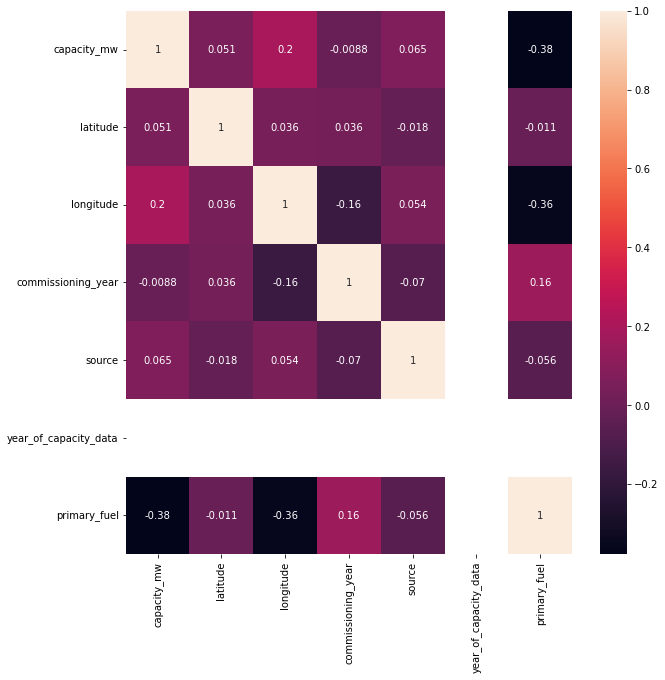

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(GPP.corr(),annot=True,annot_kws={'size': 10})

In [101]:
GPP.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
commissioning_year       0
source                   0
year_of_capacity_data    0
primary_fuel             0
dtype: int64

In [103]:
GPP.shape

(861, 7)

In [104]:
GPP.skew()

capacity_mw              3.037191
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.683585
source                  -0.604251
year_of_capacity_data    0.000000
primary_fuel             0.507576
dtype: float64

In [105]:
from sklearn.preprocessing import power_transform

In [107]:
x=power_transform

In [108]:
x=power_transform(x,method='yeo-johnson')
x

TypeError: float() argument must be a string or a number, not 'function'

# Predicting Primary Fuel

In [110]:
x=GPP.iloc[:,0:-1]
x.head(4)

,capacity_mw,latitude,longitude,commissioning_year,source,year_of_capacity_data
0,2.5,28.1839,73.2407,2011.0,12,2019.0
1,98.0,24.7663,74.6090,2015.0,84,2019.0
2,39.2,21.9038,69.3732,2015.0,105,2019.0
3,135.0,23.8712,91.3602,2004.0,106,2019.0


In [111]:
y=GPP.iloc[:,-1]
y.head(4)

0    6
1    1
2    7
3    2
Name: primary_fuel, dtype: int32

In [113]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [115]:
x_train.shape

(602, 6)

In [116]:
x_test.shape

(259, 6)

In [117]:
y_train.shape

(602,)

In [118]:
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [3 1 3 1 1 3 1 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 3
 1 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 1 3 3 1 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 1 3 3 3 3 3
 3 3 3 1 3 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 1 1 3 1 3 3 3 1 3 3 1
 3 1 3 3 3 3 1 3 3 1 3 1 3 1 3 3 3 3 1 3 3 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3]
actual value 660    6
821    1
73     1
110    1
447    1
      ..
372    2
566    3
223    2
854    3
598    3
Name: primary_fuel, Length: 259, dtype: int32
0.38223938223938225
[[ 0  0  0 15  0  0  0  0]
 [ 0 41  0 42  0  0  0  0]
 [ 0  4  0 14  0  0  0  0]
 [ 0  4  0 58  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  1  0 36  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]]
              precision    recall  f1-score   support



# Cross Validation


In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model_cv=[svc,dtc,knc,adc,gdc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.38728324 0.38953488 0.4244186  0.44186047 0.4127907 ]
0.411177577631402
0.020778413083818115
[0.78034682 0.70930233 0.78488372 0.77325581 0.76744186]
0.7630461083478963
0.027525082692876117
[0.60693642 0.72093023 0.73837209 0.70348837 0.65697674]
0.6853407716090871
0.04766555818623688
[0.56647399 0.37790698 0.51744186 0.43023256 0.41860465]
0.4621320069901868
0.06921342390950824
[0.83236994 0.84302326 0.8255814  0.8255814  0.81395349]
0.8281018954160506
0.009526242517421398


# Hypermeter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgdc=GradientBoostingClassifier()

In [124]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.8315902675090738
GradientBoostingClassifier()
{'learning_rate': 0.1}


In [125]:
gdc_final=GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdc_final.fit(x_train,y_train)
gdc_final.score(x_train,y_train)

0.8986710963455149

In [126]:
gdc_final=GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdc_final.fit(x_train,y_train)
gdc_final.score(x_train,y_train)

0.8986710963455149

In [128]:
pred_final=gdc_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y_test)

Predicted result value: [6 1 1 1 1 7 1 3 3 3 3 6 2 7 3 1 3 6 6 1 6 3 3 1 7 3 6 3 0 3 6 7 7 3 6 3 1
 1 1 3 6 3 7 3 3 3 1 3 1 3 6 3 3 1 2 7 3 7 0 3 5 0 7 1 1 7 3 6 7 3 3 1 3 6
 1 1 3 1 6 7 6 1 6 7 1 3 1 3 1 1 1 6 0 1 3 6 6 0 3 6 7 7 1 7 2 1 1 7 0 6 1
 1 1 1 3 7 0 7 6 7 7 7 3 3 6 3 3 0 1 3 1 1 3 1 6 6 6 0 6 3 1 1 1 6 6 3 7 3
 2 1 3 1 1 6 3 1 3 2 1 6 1 3 1 0 7 7 6 6 6 1 1 3 6 1 1 1 7 1 6 3 1 1 1 6 1
 7 1 7 3 2 0 1 6 7 1 3 1 6 1 3 1 0 7 1 1 6 5 0 1 1 3 2 1 6 7 1 1 1 3 1 3 7
 3 7 7 3 3 4 2 1 1 6 3 1 7 3 3 3 3 1 3 3 2 7 7 3 7 1 1 3 2 3 7 6 3 3 1 3 1]
actual value 660    6
821    1
73     1
110    1
447    1
      ..
372    2
566    3
223    2
854    3
598    3
Name: primary_fuel, Length: 259, dtype: int32


In [129]:
print('accuracy_score:',accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

accuracy_score: 0.7799227799227799
[[ 9  2  0  0  0  0  3  1]
 [ 2 64  1  6  0  2  6  2]
 [ 0  5  7  4  1  0  0  1]
 [ 0  5  0 57  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 2  1  2  2  0  0  0  0]
 [ 0  3  0  0  0  0 32  2]
 [ 0  0  0  0  0  0  1 33]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.79      0.77      0.78        83
           2       0.70      0.39      0.50        18
           3       0.80      0.92      0.86        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7
           6       0.76      0.86      0.81        37
           7       0.85      0.97      0.90        34

    accuracy                           0.78       259
   macro avg       0.57      0.56      0.56       259
weighted avg       0.75      0.78      0.76       259



In [130]:
import pickle
filename='Global_Power_Plant_Database.pkl'
pickle.dump(gdc_final, open(filename,'wb'))

# Predicting Capacity_MW

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=.30,random_state=4)

In [134]:
x1_train.shape

(602, 6)

In [135]:
x1_test.shape

(259, 6)

In [136]:
y1_train.shape

(602,)

In [137]:
lg1=LinearRegression()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)
enr=ElasticNet(alpha=0.0001)
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

model1=[lg1,ls,rd,enr,svr,dtr,knr,adr,gbr]

for n in model1:
    n.fit(x1_train,y1_train)
    n.score(x1_train,y1_train)
    predn=n.predict(x1_test)
    print('Predicted result value:',predn)
    print('actual value',y1_test)
    print('Mean absolute error:',mean_absolute_error(y1_test,predn))
    print('Mean squared error:',mean_squared_error(y1_test,predn))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predn)))
    print('r2_score:',r2_score(y1_test,predn))
    print('\n')

Predicted result value: [ 3.66414284  2.3165241   3.81183133  2.79343699  2.02515333  4.55533952
 -0.2380226   3.57445909  2.92706593  3.49244542  1.75453571  3.72911363
  1.27433158  4.0715549   3.13980843  1.14190894  3.80742427  4.02238708
  4.33118616  1.70703019  4.41569871  1.67621045  3.57042348  1.80114135
  4.12198322  3.94498446  4.16485413  3.84010192  4.27218899  2.09196823
  3.56336639  3.68068241  4.60653851  3.64843222  4.02459883  3.52511757
  3.32796818  3.02561913  2.14442892  2.97830398  4.41730784  2.51135555
  4.65989522  3.5685821   3.20154281  3.983922    2.15083792  1.4471628
  4.27154915  2.83515638  4.31706042  3.36066248  3.14314362  3.36007939
  4.24094882  3.83217581  3.72009761  3.48960029  4.04772985  1.36705137
  3.54512691  3.72629958  4.06414403  4.09733186  2.36782201  3.71584223
  2.90102703  3.55699189  4.1318287   2.93227549  3.80821132  1.15403689
  3.24604969  4.07196846  1.97562915  3.7363863   1.80751042  4.2075655
  4.47997248  4.56379623  3.5

Predicted result value: [3.23496874 1.29892296 3.18129814 1.91246405 2.02472808 3.13757703
 1.04912774 2.65578917 2.99262478 3.18500514 1.23186718 3.16077613
 2.71750547 3.17080599 3.12945486 0.91465518 3.11309067 3.23338221
 3.23174897 1.01543583 3.20762531 3.0404049  2.92181179 1.09948708
 3.18299337 3.04424548 3.22536717 3.17153436 3.14345779 3.12138712
 3.18498193 3.16676884 3.20016033 3.18174177 3.16994368 2.98549813
 3.1719761  3.07376962 2.26029621 3.0768974  3.19724198 3.09258931
 3.20165876 3.16230266 2.96555301 3.1359173  1.12257245 3.082432
 2.85098849 3.08533421 3.00329892 3.06179052 3.17601371 3.15016201
 3.18689007 3.15862885 2.63764774 2.75408045 3.18477349 0.97122671
 3.01205349 3.17656407 3.17890209 3.12551303 1.51962603 3.14599682
 2.83237391 3.22813008 3.16372047 2.31003029 3.16900185 1.09971261
 3.02816054 3.23598155 1.10116945 3.14934047 3.19122988 3.13223165
 3.19186018 3.12208193 3.21391303 3.10434195 3.19717882 3.13477064
 1.01657982 2.86967769 3.12780092 2.0305

Predicted result value: [5.69096569 1.95327417 1.82694282 1.54588937 1.3941447  7.13166553
 1.3642256  2.54269998 2.47380958 3.20397027 2.38306914 3.82871644
 2.26630923 6.49064702 3.22194945 3.35858293 3.04939668 5.41790669
 6.01564385 1.05457443 7.41012613 2.44719952 3.06973938 1.05457443
 6.44192158 2.9866997  5.69605989 2.91287647 3.71926159 2.56569196
 4.92271582 6.51793711 7.4062161  3.22655708 1.94805256 3.07921652
 1.44175753 2.06728949 1.85226925 3.05304694 4.50507784 2.47257723
 7.26950472 3.12694419 2.75276381 3.20195117 1.68840894 2.76450781
 3.33680697 3.06364716 4.85742841 3.02847892 3.22670201 2.41115227
 1.91677463 6.64002344 2.4007223  6.60710407 1.86179291 2.19122294
 2.24291501 0.52558001 6.28489844 1.52280662 2.02337662 2.52879356
 2.36511791 3.65240599 6.49064702 2.04564989 3.12694419 0.89815433
 3.05393607 6.19781976 0.99589658 3.79579707 3.56204647 2.55553804
 4.84521123 7.28262941 3.71606625 1.60880361 3.48061598 6.64367736
 1.04716414 3.00146236 1.83179695 2.77

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
score=cross_val_score(gbr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.67012618 0.74173631 0.80073809 0.72241067 0.76357722 0.70273908
 0.78457744 0.78744141]
0.7466683010651883
0.04288098500532917


# Hypermeter Tuning

In [140]:
param_gdr={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgdr=GradientBoostingRegressor()

In [141]:
gridgdr=GridSearchCV(estimator=modelgdr,param_grid=param_gdr)
gridgdr.fit(x,y)
print(gridgdr)
print(gridgdr.best_score_)
print(gridgdr.best_estimator_)
print(gridgdr.best_params_)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.7506967323355844
GradientBoostingRegressor(learning_rate=0.25)
{'learning_rate': 0.25}


In [142]:
gdr_final=GradientBoostingRegressor(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdr_final.fit(x1_train,y1_train)
gdr_final.score(x1_train,y1_train)

0.7035997846500796

In [143]:
pred_final=gdr_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y1_test)

Predicted result value: [5.14699582 1.96329065 3.15862951 1.61051832 1.56588061 6.41581887
 1.457332   2.32384966 2.3252126  3.5630822  2.06943319 3.89045953
 2.09454894 4.80464461 3.0084839  1.77993957 3.07687451 5.14699582
 5.01739989 1.34179916 7.84003126 2.26346877 2.94494928 1.34179916
 5.16141968 2.75382527 4.67305557 2.87910372 2.70564682 2.21463363
 4.66367261 5.53709562 7.02387562 2.94494928 3.46760808 2.83225511
 2.15175569 2.15175569 1.76995853 3.0084839  4.29546201 2.40434014
 6.79037172 2.87910372 2.72182896 2.89249879 1.59138241 2.51072243
 3.59976553 3.13634512 4.94627799 3.0084839  4.27869259 3.43209934
 3.17813412 5.04468178 2.26031504 5.30844631 3.46760808 1.94157197
 2.61011588 3.05519312 4.80464461 2.54403949 1.97913948 2.61011588
 2.3252126  5.03009767 4.80464461 1.99307886 2.87910372 1.16783839
 3.13634512 5.31442333 0.98346267 3.89045953 3.18603666 3.83058624
 4.26130574 6.80287031 3.61256026 2.54403949 3.8066522  5.22349333
 1.42716724 2.89145717 2.15175569 2.10